In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
from twython import Twython
from twython import TwythonStreamer
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import string
import nltk
nltk.download("stopwords")

In [141]:
APP_KEY = "LUpqT9BUMzTzdDFVYMls5myJe"
APP_SECRET = "EP31NVKfAg1kWnE3CA0FRRARJMX07irWX9VQUNyUU2pnFPlBeg"
twitter = Twython(APP_KEY, APP_SECRET)

In [142]:
for i in range(0, 17):
    user_timeline = twitter.get_user_timeline(screen_name="HillaryClinton",count=1000, include_rts=False)

In [143]:
for i, val in enumerate(user_timeline):
    user_timeline[i]['user_screen_name']=user_timeline[i]['user']['screen_name']
    user_timeline[i]['user_followers_count']=user_timeline[i]['user']['followers_count']
    user_timeline[i]['user_id']=user_timeline[i]['user']['id']
    user_timeline[i]['user_created_at']=user_timeline[i]['user']['created_at']
    if 'retweeted_status' in user_timeline[i].keys():
        user_timeline[i]['rt_count'] = user_timeline[i]['retweeted_status']['retweet_count']
        user_timeline[i]['qt_id'] = user_timeline[i]['retweeted_status']['id']
        user_timeline[i]['rt_created'] = user_timeline[i]['retweeted_status']['created_at']
        user_timeline[i]['rt_user_screenname'] = user_timeline[i]['retweeted_status']['user']['name']
        user_timeline[i]['rt_user_id'] = user_timeline[i]['retweeted_status']['user']['id']
        user_timeline[i]['rt_user_followers'] = user_timeline[i]['retweeted_status']['user']['followers_count']
        del user_timeline[i]['retweeted_status']
    if 'quoted_status' in user_timeline[i].keys():
        user_timeline[i]['qt_created'] = user_timeline[i]['quoted_status']['created_at']
        user_timeline[i]['qt_id'] = user_timeline[i]['quoted_status']['id']
        user_timeline[i]['qt_text'] = user_timeline[i]['quoted_status']['text']
        user_timeline[i]['qt_user_screenname'] = user_timeline[i]['quoted_status']['user']['name']
        user_timeline[i]['qt_user_id'] = user_timeline[i]['quoted_status']['user']['id']
        user_timeline[i]['qt_user_followers'] = user_timeline[i]['quoted_status']['user']['followers_count']
        del user_timeline[i]['quoted_status']
    if user_timeline[i]['entities']['urls']: #list
        for j, val in enumerate(user_timeline[i]['entities']['urls']):
            urlj='url_'+str(j)
            user_timeline[i][urlj]=user_timeline[i]['entities']['urls'][j]['expanded_url']
    if user_timeline[i]['entities']['user_mentions']: #list
        for j, val in enumerate(user_timeline[i]['entities']['user_mentions']):
            mentionj='mention_'+str(j)
            user_timeline[i][mentionj] = user_timeline[i]['entities']['user_mentions'][j]['screen_name']
    if user_timeline[i]['entities']['hashtags']: #list
        for j, val in enumerate(user_timeline[i]['entities']['hashtags']):
            hashtagj='hashtag_'+str(j)
            user_timeline[i][hashtagj] = user_timeline[i]['entities']['hashtags'][j]['text']
    if user_timeline[i]['coordinates'] is not None:  #NoneType or Dict
        user_timeline[i]['coord_long'] = user_timeline[i]['coordinates']['coordinates'][0]
        user_timeline[i]['coord_lat'] = user_timeline[i]['coordinates']['coordinates'][1]
    del user_timeline[i]['coordinates']
    del user_timeline[i]['user']
    del user_timeline[i]['entities']
    if 'place' in user_timeline[i].keys():  #NoneType or Dict
        del user_timeline[i]['place']
    if 'extended_entities' in user_timeline[i].keys():
        del user_timeline[i]['extended_entities']
    if 'geo' in user_timeline[i].keys():
        del user_timeline[i]['geo']
        


In [144]:
df1 = pd.DataFrame(user_timeline)
print(df1)

    contributors                      created_at  favorite_count favorited  \
0           None  Sat Sep 24 02:08:19 +0000 2016            4223     False   
1           None  Sat Sep 24 00:13:50 +0000 2016            8774     False   
2           None  Fri Sep 23 23:36:29 +0000 2016            5335     False   
3           None  Fri Sep 23 23:02:20 +0000 2016            2965     False   
4           None  Fri Sep 23 22:23:01 +0000 2016            4775     False   
5           None  Fri Sep 23 20:58:07 +0000 2016            5692     False   
6           None  Fri Sep 23 19:16:58 +0000 2016            4323     False   
7           None  Fri Sep 23 18:42:49 +0000 2016           16128     False   
8           None  Fri Sep 23 16:49:24 +0000 2016            4896     False   
9           None  Fri Sep 23 14:03:04 +0000 2016           17882     False   
10          None  Fri Sep 23 11:57:49 +0000 2016           25796     False   
11          None  Fri Sep 23 02:59:02 +0000 2016            6742

In [139]:
#initial creation of dataframe
Hillary = pd.DataFrame(user_timeline)
Hillary.head()

,contributors,created_at,favorite_count,favorited,hashtag_0,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,source,text,truncated,url_0,url_1,user_created_at,user_followers_count,user_id,user_screen_name
0,None,Sat Sep 24 02:08:19 +0000 2016,4221,False,NaN,779502695187148800,779502695187148800,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""Hillary Clinton is one of the best prepared c...",False,http://lat.ms/2d2HMc9,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
1,None,Sat Sep 24 00:13:50 +0000 2016,8768,False,NaN,779473882910720000,779473882910720000,None,NaN,None,...,False,"<a href=""https://studio.twitter.com"" rel=""nofo...",If the young women of this country have Donald...,False,NaN,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
2,None,Fri Sep 23 23:36:29 +0000 2016,5335,False,NaN,779464482984697856,779464482984697856,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...",Republicans are once again turning their backs...,True,https://twitter.com/i/web/status/7794644829846...,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
3,None,Fri Sep 23 23:02:20 +0000 2016,2965,False,NaN,779455891586314240,779455891586314240,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""I was just blown away by this 9-year-old girl...",False,http://www.snappytv.com/tc/2857975,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
4,None,Fri Sep 23 22:23:01 +0000 2016,4774,False,NaN,779445994987610112,779445994987610112,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""Donald Trump committed perjury. Or he looked ...",False,http://hrc.io/2dgqWYk,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton


In [145]:
HillaryClinton=Hillary.append(df1, ignore_index=True)

In [146]:
print(HillaryClinton)

    contributors                      created_at  favorite_count favorited  \
0           None  Sat Sep 24 02:08:19 +0000 2016            4221     False   
1           None  Sat Sep 24 00:13:50 +0000 2016            8768     False   
2           None  Fri Sep 23 23:36:29 +0000 2016            5335     False   
3           None  Fri Sep 23 23:02:20 +0000 2016            2965     False   
4           None  Fri Sep 23 22:23:01 +0000 2016            4774     False   
5           None  Fri Sep 23 20:58:07 +0000 2016            5689     False   
6           None  Fri Sep 23 19:16:58 +0000 2016            4322     False   
7           None  Fri Sep 23 18:42:49 +0000 2016           16124     False   
8           None  Fri Sep 23 16:49:24 +0000 2016            4896     False   
9           None  Fri Sep 23 14:03:04 +0000 2016           17881     False   
10          None  Fri Sep 23 11:57:49 +0000 2016           25791     False   
11          None  Fri Sep 23 02:59:02 +0000 2016            6742

In [147]:
#check content
HillaryClinton.head()

,contributors,created_at,favorite_count,favorited,hashtag_0,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,source,text,truncated,url_0,url_1,user_created_at,user_followers_count,user_id,user_screen_name
0,None,Sat Sep 24 02:08:19 +0000 2016,4221,False,NaN,779502695187148800,779502695187148800,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""Hillary Clinton is one of the best prepared c...",False,http://lat.ms/2d2HMc9,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
1,None,Sat Sep 24 00:13:50 +0000 2016,8768,False,NaN,779473882910720000,779473882910720000,None,NaN,None,...,False,"<a href=""https://studio.twitter.com"" rel=""nofo...",If the young women of this country have Donald...,False,NaN,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
2,None,Fri Sep 23 23:36:29 +0000 2016,5335,False,NaN,779464482984697856,779464482984697856,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...",Republicans are once again turning their backs...,True,https://twitter.com/i/web/status/7794644829846...,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
3,None,Fri Sep 23 23:02:20 +0000 2016,2965,False,NaN,779455891586314240,779455891586314240,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""I was just blown away by this 9-year-old girl...",False,http://www.snappytv.com/tc/2857975,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton
4,None,Fri Sep 23 22:23:01 +0000 2016,4774,False,NaN,779445994987610112,779445994987610112,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""Donald Trump committed perjury. Or he looked ...",False,http://hrc.io/2dgqWYk,NaN,Tue Apr 09 18:04:35 +0000 2013,8940347,1339835893,HillaryClinton


In [148]:
#d = dict(screen_name = screen_name, Favorites = favorites_count, Retweets = retweets_count,Date = date, Text = text)

#HillaryClinton = pd.DataFrame({k : pd.Series(v) for k, v in  list(d.items())})
status_texts = HillaryClinton[['text']]
print(status_texts)

                                                  text
0    "Hillary Clinton is one of the best prepared c...
1    If the young women of this country have Donald...
2    Republicans are once again turning their backs...
3    "I was just blown away by this 9-year-old girl...
4    "Donald Trump committed perjury. Or he looked ...
5    "Hillary Clinton would make a sober, smart and...
6    Addiction is a disease—not a moral failing. We...
7    Charlotte should release police video of the K...
8    "She gives us hope for the future. She's our g...
9    When Donald Trump speaks about women, our daug...
10   Is this the president we want for our daughter...
11   "He's 70 years old, and he's still a bully." —...
12   Our favorite moments from Hillary's appearance...
13   "Vote." —@Lin_Manuel https://t.co/tTgeqxNqYm h...
14   "I really regret doing this." —Hillary on Betw...
15   Let's make sure nobody who works full-time in ...
16   Donald Trump's ties to Russia may conflict wit...
17   Very 

In [149]:
#count words in each tweet, we can also lower all the words/characters to by using .lower(),
words = pd.Series(' '.join(HillaryClinton.text).split())
#count words in each tweet, we can also lower all the words/characters to by using .lower(),
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

In [160]:
#implementation of stop words using nltk library for language processing
terms_stop = [term for term in words if term not in stop]

In [161]:
print(terms_stop)

['"Hillary', 'Clinton', 'one', 'best', 'prepared', 'candidates', 'seek', 'presidency."', '—@LATimes', 'https://t.co/NG1am536OS', 'If', 'young', 'women', 'country', 'Donald', 'Trump', 'president,', 'think', 'themselves?', 'https://t.co/1IrjWddzzy', 'Republicans', 'turning', 'backs', 'people', 'Flint', 'waited', 'far', 'long', 'help.', "It's", 'w…', 'https://t.co/sYyqDHAVXp', '"I', 'blown', 'away', '9-year-old', 'girl."', '—Hillary', 'meeting', 'disability', 'rights', 'advocate', '@AnastasiaSomoza', 'https://t.co/nrjcqfGiRe', '"Donald', 'Trump', 'committed', 'perjury.', 'Or', 'looked', 'faces', 'Republican', 'faithful', 'knowingly', 'lied."', 'https://t.co/enl4NTjdX4', '"Hillary', 'Clinton', 'would', 'make', 'sober,', 'smart', 'pragmatic', 'president.', 'Donald', 'Trump', 'would', 'catastrophe."', '—@LATimes', 'https://t.co/NG1am536OS', 'Addiction', 'disease—not', 'moral', 'failing.', 'We', 'support', 'struggling', 'it.', '#OpioidAwarenessWeek', 'https://t.co/V9Uz3jVEjN', 'Charlotte', 'r

In [164]:
word_counts = {}
for word in terms_stop:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

In [165]:
print(word_counts)

{'American.': 2, 'today,': 2, 'Kaine!”': 2, 'student': 6, "don't": 4, 'enough': 2, 'resto…': 2, 'decisions': 2, 'judge': 4, 'helped': 2, '—Roxie,': 2, 'women’s': 2, 'https://t.co/KzgPQgPjxK': 2, 'path': 2, 'ordinary': 2, 'Our': 4, 'President,': 2, 'first': 8, 'affordable': 2, 'delay.': 2, 'face.': 2, 'people': 20, 'perjury.': 2, 'you:': 4, 'campaign."': 2, 'It’s': 10, 'reform.': 2, 'None': 2, 'foundation': 2, 'you,': 2, 'caring': 2, "hasn't.": 2, 'rights': 2, 'reality': 4, 'cancer': 2, 'meet': 2, 'becoming': 2, 'number': 2, 'Symposium:': 2, 'We’re': 2, 'https://t.co/lkOFcHI4Py': 2, 'medical': 2, 'don’t,': 2, 'help': 4, 'aimed': 2, 'safe': 2, 'got': 16, 'child': 2, 'https://t.co/5TU9olTqd5': 2, 'against.”': 2, 'discriminating': 2, 'childhood': 2, 'scale': 2, 'You': 6, '60%': 2, 'backs': 4, 'calls': 2, 'Register': 2, 'Clinton': 10, 'ad': 2, 'vote."': 4, 'voter.': 2, 'video': 2, 'https://t.co/lTxRVn3NBM': 2, 'Latino': 2, 'Americans': 8, 'is.': 2, 'police': 8, 'https://t.co/5WX2qYgUjC': 2,

In [174]:
#one more filtering with some custome specified stopwords what are not in nltk library
filterClinton = {k: v for k, v in word_counts.items() if v > 1}

print(filterClinton)

Stopwords = ['A','AND','An','And','As','Be','C','this','they',
'Can','D','Do','Don','For','Go','He','IS','Is','It','K','M', 'I',
'O','On','P','Q','R','S','So','T','THE','That','The','Their','There',
'They','This','U','we','you','words','w','ve','u','the','that','than',
'her','he','had','for','e','d','co','a','V','TV','was','to','so','she'
't','such','some','s','re','my','m','ll','is','it','of','as','at','am',
't', 'or','our','in','do','be','them','they','their','this','were','when',
'who','with','what','amp','an','and','are','000','your','she','him','his',
'get','but','would','https','on','realDonaldTrump','have','will','all','has',
'just', 'MakeAmericaGreatAgain','now','out','about','from','by', 'the', 'v', 'b','—Hillary','&amp;']

#for k,v in filtertrump.items():
    #if k in Stopwords:
        #del filtertrump[k]
        
for k, v in list(filterClinton.items()):
    print(k, v)
    if k in Stopwords:
        del filterClinton[k]

{'American.': 2, 'today,': 2, 'Kaine!”': 2, 'student': 6, "don't": 4, 'enough': 2, 'up!):': 2, 'love': 8, 'helped': 2, '—Roxie,': 2, 'safer...and': 2, 'shooting': 2, 'path': 2, 'ordinary': 2, 'Our': 4, 'President,': 2, 'Grateful': 2, 'affordable': 2, 'delay.': 2, 'face.': 2, 'people': 20, 'women’s': 2, 'you:': 4, 'campaign."': 2, 'It’s': 10, 'reform.': 2, 'None': 2, 'innate': 2, 'foundation': 2, 'you,': 2, 'progress': 4, 'caring': 2, "hasn't.": 2, 'rights': 2, 'shows': 2, 'cynicism,': 2, 'becoming': 2, 'entrepreneurial': 2, 'could': 2, 'We’re': 2, 'https://t.co/lkOFcHI4Py': 2, 'alongside': 2, 'help': 4, 'aimed': 2, 'trail.': 2, 'safe': 2, 'got': 16, 'child': 2, 'discriminating': 2, 'loose': 2, 'You': 6, '60%': 2, 'failing.': 2, 'took': 2, 'backs': 4, 'meet': 2, 'generations.': 2, 'Register': 2, 'Clinton': 10, 'Four': 2, 'vote."': 4, 'voter.': 2, 'video': 2, 'https://t.co/lTxRVn3NBM': 2, 'Latino': 2, 'Americans': 8, 'police': 8, 'https://t.co/5WX2qYgUjC': 2, 'Sexes.”': 2, 'other.”': 4, 

In [175]:
toptwentyClinton = dict(Counter(filterClinton).most_common(20))
print(toptwentyClinton)


{'chance': 12, 'Donald': 48, 'Trump': 78, 'people': 20, 'president': 22, 'want': 18, 'got': 16, 'It’s': 10, '"I': 12, 'We': 46, 'https://t.co/tTgeqxNqYm': 24, 'American': 14, '—@FLOTUS': 16, 'next': 12, 'Hillary': 26, 'college': 12, 'us': 12, 'one': 12, 'need': 12, 'make': 18}


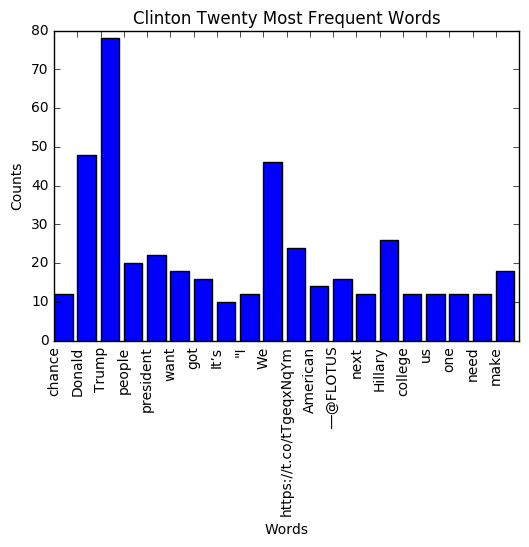

In [176]:
plt.bar(range(len(toptwentyClinton)), toptwentyClinton.values(), align='edge')
plt.xticks(range(len(toptwentyClinton)), toptwentyClinton.keys(), rotation=90)
plt.title('Clinton Twenty Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Counts')

In [177]:
#counting words
from collections import Counter
counts = Counter(word_counts)
print(counts)

Counter({'Trump': 78, 'Donald': 48, 'We': 46, '—Hillary': 40, 'Hillary': 26, 'https://t.co/tTgeqxNqYm': 24, 'president': 22, 'people': 20, 'get': 20, 'make': 18, 'want': 18, 'got': 16, '—@FLOTUS': 16, 'This': 14, 'American': 14, 'next': 12, '&amp;': 12, 'us': 12, 'chance': 12, 'college': 12, '"I': 12, 'need': 12, 'The': 12, 'one': 12, 'It’s': 10, 'Clinton': 10, 'deserve': 10, 'go': 10, 'work': 10, 'birther': 10, 'take': 10, 'women': 10, 'great': 10, 'much': 10, 'someone': 10, 'gets': 10, 'country': 10, 'America': 10, 'years': 10, 'would': 10, "Hillary's": 10, 'When': 10, 'It': 10, 'vote': 10, 'build': 10, 'Americans': 8, 'good': 8, 'better': 8, 'without': 8, 'born': 8, "It's": 8, 'things': 8, 'looks': 8, 'every': 8, 'president.': 8, 'election': 8, 'love': 8, 'police': 8, '"You': 8, 'everyone': 8, 'believe': 8, 'first': 8, 'sees': 8, 'know': 8, 'economy': 8, '"The': 8, 'real': 8, 'led': 8, 'it.': 8, 'see': 8, 'this.': 8, 'live': 8, 'hate.': 8, 'If': 8, 'You': 6, 'racist': 6, 'change': 6

In [178]:
a = Counter(counts).most_common(20)
print (a)

[('Trump', 78), ('Donald', 48), ('We', 46), ('—Hillary', 40), ('Hillary', 26), ('https://t.co/tTgeqxNqYm', 24), ('president', 22), ('people', 20), ('get', 20), ('make', 18), ('want', 18), ('got', 16), ('—@FLOTUS', 16), ('American', 14), ('This', 14), ('next', 12), ('&amp;', 12), ('us', 12), ('chance', 12), ('college', 12)]


In [179]:
from prettytable import PrettyTable

pt = PrettyTable(field_names=['word', 'Frequency'])
[ pt.add_row(row) for row in sorted(a, reverse=True)[:20] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

+-------------------------+-----------+
| word                    | Frequency |
+-------------------------+-----------+
| —Hillary                | 40        |
| —@FLOTUS                | 16        |
| want                    | 18        |
| us                      | 12        |
| president               | 22        |
| people                  | 20        |
| next                    | 12        |
| make                    | 18        |
| https://t.co/tTgeqxNqYm | 24        |
| got                     | 16        |
| get                     | 20        |
| college                 | 12        |
| chance                  | 12        |
| We                      | 46        |
| Trump                   | 78        |
| This                    | 14        |
| Hillary                 | 26        |
| Donald                  | 48        |
| American                | 14        |
| &amp;                   | 12        |
+-------------------------+-----------+
